In [1]:
# Import the libraries
import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [2]:
# Check that a GPU is available
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [3]:
# Check the number of GPUs available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Get device details
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5079590472719646034, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4937233203
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12305164786368392159
 physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"]

### Simple logistic regression model

In [5]:
# Import the data
data = pd.read_csv('banknote_data.csv')
data.head(n=5)

,x1,x2,x3,x4,y
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
# Prepare the data
X = data.iloc[:,0:4]
y = data[['y']]

# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [7]:
# Define the model layers
D = X.shape[1] # Size of input vector
input_layer = tf.keras.layers.Input(shape=(D,))
dense_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [8]:
# Create the model
model = tf.keras.Sequential([input_layer, dense_layer])

In [9]:
# Define how the model will be trained/fit
model.compile(optimizer='adam', # define the optimizer (adam is one way of doing gradient descent)
              loss='binary_crossentropy', # define the cost function
              metrics=['accuracy']) # define the metrics that tensorflow should keep track of

In [10]:
# Train/fit the model
result = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=150);

Train on 1029 samples, validate on 343 samples
Epoch 1/150
1029/1029 [==============================] - 1s 666us/sample - loss: 0.5474 - accuracy: 0.7716 - val_loss: 0.5206 - val_accuracy: 0.7843
Epoch 2/150
1029/1029 [==============================] - 0s 75us/sample - loss: 0.4799 - accuracy: 0.8017 - val_loss: 0.4578 - val_accuracy: 0.8017
Epoch 3/150
1029/1029 [==============================] - 0s 79us/sample - loss: 0.4198 - accuracy: 0.8124 - val_loss: 0.4007 - val_accuracy: 0.8076
Epoch 4/150
1029/1029 [==============================] - 0s 75us/sample - loss: 0.3677 - accuracy: 0.8222 - val_loss: 0.3524 - val_accuracy: 0.8338
Epoch 5/150
1029/1029 [==============================] - 0s 77us/sample - loss: 0.3238 - accuracy: 0.8426 - val_loss: 0.3111 - val_accuracy: 0.8455
Epoch 6/150
1029/1029 [==============================] - 0s 71us/sample - loss: 0.2887 - accuracy: 0.8649 - val_loss: 0.2820 - val_accuracy: 0.8688
Epoch 7/150
1029/1029 [==============================] - 0s 107u

1029/1029 [==============================] - 0s 68us/sample - loss: 0.0864 - accuracy: 0.9854 - val_loss: 0.0898 - val_accuracy: 0.9767
Epoch 55/150
1029/1029 [==============================] - 0s 71us/sample - loss: 0.0853 - accuracy: 0.9854 - val_loss: 0.0888 - val_accuracy: 0.9767
Epoch 56/150
1029/1029 [==============================] - 0s 71us/sample - loss: 0.0842 - accuracy: 0.9864 - val_loss: 0.0877 - val_accuracy: 0.9767
Epoch 57/150
1029/1029 [==============================] - 0s 72us/sample - loss: 0.0831 - accuracy: 0.9874 - val_loss: 0.0867 - val_accuracy: 0.9796
Epoch 58/150
1029/1029 [==============================] - 0s 70us/sample - loss: 0.0821 - accuracy: 0.9874 - val_loss: 0.0858 - val_accuracy: 0.9796
Epoch 59/150
1029/1029 [==============================] - 0s 71us/sample - loss: 0.0811 - accuracy: 0.9874 - val_loss: 0.0848 - val_accuracy: 0.9796
Epoch 60/150
1029/1029 [==============================] - 0s 69us/sample - loss: 0.0801 - accuracy: 0.9874 - val_loss: 

Epoch 109/150
1029/1029 [==============================] - 0s 66us/sample - loss: 0.0511 - accuracy: 0.9903 - val_loss: 0.0573 - val_accuracy: 0.9854
Epoch 110/150
1029/1029 [==============================] - 0s 64us/sample - loss: 0.0507 - accuracy: 0.9903 - val_loss: 0.0570 - val_accuracy: 0.9854
Epoch 111/150
1029/1029 [==============================] - 0s 68us/sample - loss: 0.0504 - accuracy: 0.9903 - val_loss: 0.0567 - val_accuracy: 0.9854
Epoch 112/150
1029/1029 [==============================] - 0s 70us/sample - loss: 0.0500 - accuracy: 0.9903 - val_loss: 0.0564 - val_accuracy: 0.9854
Epoch 113/150
1029/1029 [==============================] - 0s 63us/sample - loss: 0.0498 - accuracy: 0.9903 - val_loss: 0.0561 - val_accuracy: 0.9854
Epoch 114/150
1029/1029 [==============================] - 0s 68us/sample - loss: 0.0494 - accuracy: 0.9903 - val_loss: 0.0558 - val_accuracy: 0.9854
Epoch 115/150
1029/1029 [==============================] - 0s 67us/sample - loss: 0.0491 - accuracy:

In [11]:
# Print the results
print("Train score:", model.evaluate(x=X_train, y=y_train, verbose=0)[1]);
print("Test score:", model.evaluate(x=X_test, y=y_test, verbose=0)[1]);

Train score: 0.9912537
Test score: 0.9883382


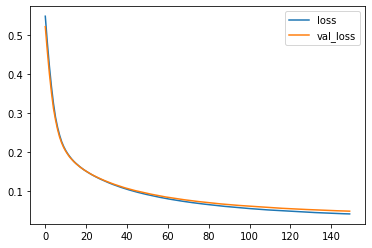

In [12]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='loss');
plt.plot(result.history['val_loss'], label='val_loss');
plt.legend();

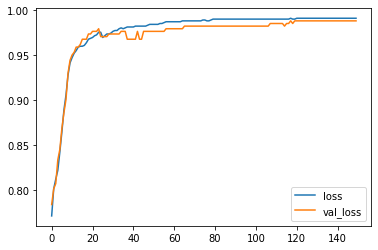

In [13]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='loss');
plt.plot(result.history['val_accuracy'], label='val_loss');
plt.legend();

In [14]:
# Save the model
model.save('linear_classifier_banknotes.h5')

### Try another example

In [15]:
# Import the dataset
data = load_breast_cancer()

In [16]:
# Check data type
type(data)

sklearn.utils.Bunch

In [17]:
# Bunch is like a dict, so we can have a look at the keys
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
# Inspect the data shape
data.data.shape

(569, 30)

In [19]:
# Inpect the target shape
data.target.shape

(569,)

In [20]:
# See what the 1s and 0s mean
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [21]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.data)

In [22]:
# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data.target, test_size=0.25, random_state=100)

In [23]:
# Define the model layers
D = data_scaled.shape[1] # Size of input vector
input_layer = tf.keras.layers.Input(shape=(D,))
dense_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [24]:
# Create the model
model = tf.keras.Sequential([input_layer, dense_layer])

In [25]:
# Define how the model will be trained/fit
model.compile(optimizer='adam', # define the optimizer (adam is one way of doing gradient descent)
              loss='binary_crossentropy', # define the cost function
              metrics=['accuracy']) # define the metrics that tensorflow should keep track of

In [26]:
# Train/fit the model
result = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=150);

Train on 426 samples, validate on 143 samples
Epoch 1/150
426/426 [==============================] - 1s 1ms/sample - loss: 1.3989 - accuracy: 0.1948 - val_loss: 1.4524 - val_accuracy: 0.1888
Epoch 2/150
426/426 [==============================] - 0s 122us/sample - loss: 1.2646 - accuracy: 0.2300 - val_loss: 1.2977 - val_accuracy: 0.1958
Epoch 3/150
426/426 [==============================] - 0s 116us/sample - loss: 1.1420 - accuracy: 0.2793 - val_loss: 1.1617 - val_accuracy: 0.2098
Epoch 4/150
426/426 [==============================] - 0s 114us/sample - loss: 1.0298 - accuracy: 0.3216 - val_loss: 1.0365 - val_accuracy: 0.2727
Epoch 5/150
426/426 [==============================] - 0s 106us/sample - loss: 0.9305 - accuracy: 0.3944 - val_loss: 0.9271 - val_accuracy: 0.3566
Epoch 6/150
426/426 [==============================] - 0s 113us/sample - loss: 0.8429 - accuracy: 0.4390 - val_loss: 0.8347 - val_accuracy: 0.4545
Epoch 7/150
426/426 [==============================] - 0s 105us/sample - l

426/426 [==============================] - 0s 108us/sample - loss: 0.1502 - accuracy: 0.9601 - val_loss: 0.1456 - val_accuracy: 0.9441
Epoch 57/150
426/426 [==============================] - 0s 113us/sample - loss: 0.1484 - accuracy: 0.9624 - val_loss: 0.1442 - val_accuracy: 0.9441
Epoch 58/150
426/426 [==============================] - 0s 110us/sample - loss: 0.1465 - accuracy: 0.9624 - val_loss: 0.1426 - val_accuracy: 0.9510
Epoch 59/150
426/426 [==============================] - 0s 106us/sample - loss: 0.1448 - accuracy: 0.9624 - val_loss: 0.1410 - val_accuracy: 0.9580
Epoch 60/150
426/426 [==============================] - 0s 117us/sample - loss: 0.1431 - accuracy: 0.9624 - val_loss: 0.1396 - val_accuracy: 0.9580
Epoch 61/150
426/426 [==============================] - 0s 113us/sample - loss: 0.1415 - accuracy: 0.9648 - val_loss: 0.1383 - val_accuracy: 0.9580
Epoch 62/150
426/426 [==============================] - 0s 99us/sample - loss: 0.1399 - accuracy: 0.9648 - val_loss: 0.1369 -

426/426 [==============================] - 0s 108us/sample - loss: 0.0967 - accuracy: 0.9836 - val_loss: 0.1030 - val_accuracy: 0.9650
Epoch 112/150
426/426 [==============================] - 0s 110us/sample - loss: 0.0962 - accuracy: 0.9836 - val_loss: 0.1028 - val_accuracy: 0.9650
Epoch 113/150
426/426 [==============================] - 0s 110us/sample - loss: 0.0957 - accuracy: 0.9836 - val_loss: 0.1024 - val_accuracy: 0.9650
Epoch 114/150
426/426 [==============================] - 0s 113us/sample - loss: 0.0952 - accuracy: 0.9836 - val_loss: 0.1021 - val_accuracy: 0.9650
Epoch 115/150
426/426 [==============================] - 0s 115us/sample - loss: 0.0947 - accuracy: 0.9836 - val_loss: 0.1019 - val_accuracy: 0.9650
Epoch 116/150
426/426 [==============================] - 0s 113us/sample - loss: 0.0943 - accuracy: 0.9836 - val_loss: 0.1015 - val_accuracy: 0.9650
Epoch 117/150
426/426 [==============================] - 0s 120us/sample - loss: 0.0938 - accuracy: 0.9836 - val_loss: 0

In [27]:
# Print the results
print("Train score:", model.evaluate(x=X_train, y=y_train, verbose=0)[1]);
print("Test score:", model.evaluate(x=X_test, y=y_test, verbose=0)[1]);

Train score: 0.9859155
Test score: 0.96503496


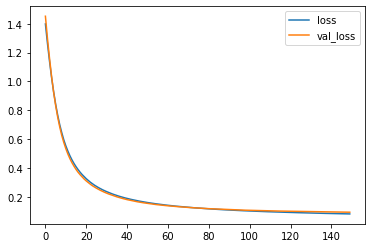

In [28]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='loss');
plt.plot(result.history['val_loss'], label='val_loss');
plt.legend();

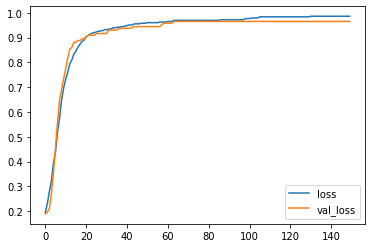

In [29]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='loss');
plt.plot(result.history['val_accuracy'], label='val_loss');
plt.legend();

In [30]:
# Save the model
model.save('linear_classifier_breast_cancer.h5')

In [31]:
# Load the model
model = tf.keras.models.load_model('linear_classifier_breast_cancer.h5')
print(model.layers)

In [32]:
# Print the results
print("Train score:", model.evaluate(x=X_train, y=y_train, verbose=0)[1]);
print("Test score:", model.evaluate(x=X_test, y=y_test, verbose=0)[1]);

Train score: 0.9859155
Test score: 0.96503496


It worked! :D